In [2]:
import pandas as pd
import numpy as np
import sqlite3
import pandas_profiling
import rpy2
import rpy2.rinterface
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
#import rpy2.ipython

### Visualize the negative values

In [5]:
df = pd.read_csv('C:/githubrepo/7331_Project/data/Employee_Compensation.csv')
print("Finished Loading Data.")

Finished Loading Data.


In [35]:
df_clean = df[df['Year Type'] == 'Fiscal']
df_clean = df_clean.reset_index(drop=True)

### Gets the rows that have a least 1 negative value saves to df_neg

In [36]:
indexNames1 = df_clean.loc[df_clean['Salaries'] < 0, 'Salaries'].index.tolist()
indexNames2 = df_clean.loc[df_clean['Overtime'] < 0, 'Overtime'].index.tolist()
indexNames3 = df_clean.loc[df_clean['Other Salaries'] < 0, 'Other Salaries'].index.tolist()
indexNames4 = df_clean.loc[df_clean['Total Salary'] < 0, 'Total Salary'].index.tolist()
indexNames5 = df_clean.loc[df_clean['Retirement'] < 0, 'Retirement'].index.tolist()
indexNames6 = df_clean.loc[df_clean['Health and Dental'] < 0, 'Health and Dental'].index.tolist()
indexNames7 = df_clean.loc[df_clean['Other Benefits'] < 0, 'Other Benefits'].index.tolist()
indexNames8 = df_clean.loc[df_clean['Total Benefits'] < 0, 'Total Benefits'].index.tolist()
indexNames9 = df_clean.loc[df_clean['Total Compensation'] < 0, 'Total Compensation'].index.tolist()
indexCombo = indexNames1 + indexNames2 + indexNames3 + indexNames4 + indexNames5 + indexNames6 + indexNames7 + indexNames8 + indexNames9

def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    return unique_list

ind = unique(indexCombo)
df_neg = df_clean.loc[ind]
df_neg.info()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDCF6BE4E0>,
      dtype=object)

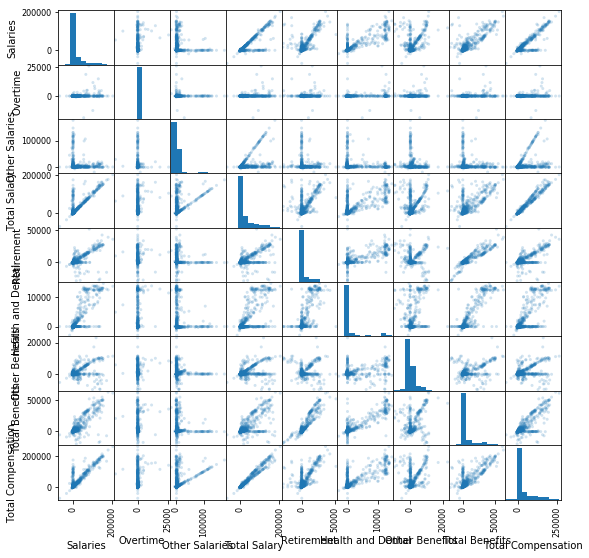

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_neg.iloc[:,13:22], alpha=0.2, figsize=(9, 9))
#sns.pairplot(autodata1, hue="origin", size=3)

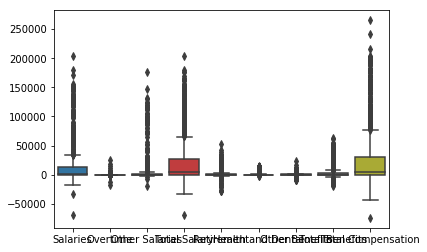

In [57]:
#Box plot of cleaned data that has negatives
ax = sns.boxplot(data=df_neg.iloc[:,13:22])

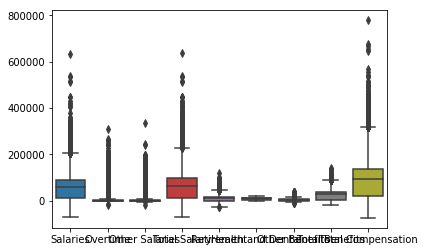

In [58]:
#Box plot of cleaned data without the negatives
ax = sns.boxplot(data=df_clean.iloc[:,13:22])